In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.cluster import KMeans

## Part A: Baseline Model and Data Analysis

Data Loading and Analysis

In [146]:
df = pd.read_csv('creditcard.csv')

In [147]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [148]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


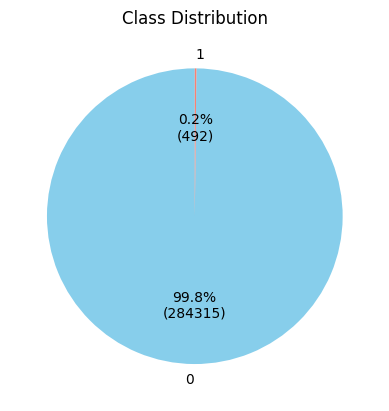

In [149]:
counts = df['Class'].value_counts()
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(
    counts,
    labels=counts.index,
    autopct=lambda pct: func(pct, counts),
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title('Class Distribution')
plt.show()

- The number of fraudulent transactions make up only 0.2% (492/284807) of the total number of transactions.
- The number of non-fraudulent transactions make up 99.8% (284315/284807) of the total number of transactions.
- Degree of imbalance = 284315/492 = 577.88
- The dataset is highly imbalanced.

Model Training

In [168]:
X = df.drop(columns = ["Class"])
Y = df["Class"]

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

- To keep the distribution of fraud/non-fraud in the test and train equal, we use the stratify option.

In [170]:
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of test dataset: {X_test.shape}")

Shape of training dataset: (227845, 30)
Shape of test dataset: (56962, 30)


In [171]:
Y_train.value_counts()/Y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

In [172]:
Y_test.value_counts()/Y_test.shape

Class
0    0.99828
1    0.00172
Name: count, dtype: float64

In [173]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [174]:
model_1 = LogisticRegression(max_iter=10000)
model_1.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

Evaluation on Test Dataset

In [175]:
X_test = scaler.transform(X_test)
y_pred = model_1.predict(X_test)

In [176]:
print(classification_report(Y_test,y_pred,target_names=["non-fraud","fraud"],digits=4))

              precision    recall  f1-score   support

   non-fraud     0.9993    0.9998    0.9996     56864
       fraud     0.8714    0.6224    0.7262        98

    accuracy                         0.9992     56962
   macro avg     0.9354    0.8111    0.8629     56962
weighted avg     0.9991    0.9992    0.9991     56962



- Accuracy is not a good metric in the case of imbalanced datasets since it misleadingly hides the performance of the model on the minority class. In imbalanced datasets, it is often important for the model to identify the minority class correctly (Fraud Detection,Defect Detection etc.).
- Let us consider the case of a "dumb" classifier that always predicts 0 (majority class). If we were to run this dumb classifier on our data, it would easily achieve 99.8% accuracy (proportion of the majority class) while misclassifying every minority class datapoint. Thus, accuracy is not a good metric due to it being heavily biased towards the majority class. For our model, we see that it achieves an accuracy of 99.92%, which is deceivingly optimistic. 
- To evaluate the model's performance in more unbiased way, we examine metrics that are sensitive to class imbalance, such as Precision, Recall, and F1 Score. These metrics are dependent on the minority class, and accurately reflect the model's performance on the minority class classification unlike accuracy.
- The Precision, Recall, and F1 scores of the model on the test data paint a different picture. The precision is 0.8714, and recall is 0.6224, indicating that there is misclassification of the minority class. Since the precision is larger than the recall, we can say that model suffers more from predicting False Negatives than False Positives. The F1 score is just harmonic mean of precision and recall, which takes a hit when either precision or recall is affected.
- Overall, we can say that this model does not perform well on the minority class, due to the extremely high class imbalance.   

## Part B: Gaussian Mixture Model for Synthetic Sampling

Theoretical Foundation

### SMOTE:
1. Purely geometric method of sampling.
2. For each minority class sample ($x$), SMOTE finds its *k* nearest minority neighbors.
3. One neighbor ($x_{nn}$) is chosen at random.
4. A synthetic sample is generated along the line segment between ($x$) and ($x_{nn}$):
   $x_{new} = x + \delta \cdot (x_{nn} - x), \quad \delta \sim U(0,1)$

5. This process is repeated until the minority class reaches the desired size.

### GMM:
1. Probabilistic method of sampling.
2. The GMM assumes data comes from a mixture of several Gaussian distributions:
$p(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k)$
3. Randomly pick a component $k$ with probability $\pi_k$.  
4. Draw a sample from $\mathcal{N}(\mu_k, \Sigma_k)$.  

### Why GMM is better than SMOTE at modelling the minority class:
1. SMOTE may create unrealistic/noisy data points that lie in regions that is not representative of the minority data, thus, it will fail in the case where the minority data comprises of multiple clusters.
2. On the other hand, GMM naturally fits a Gaussian associated with each cluster and models it separately.
3. GMM is capable of modelling correlated features which often arise in high dimensional datasets. SMOTE does not have this feature and can only linearly interpolate with its neighbours.
4. GMM explicitly evaluates the probability density function of the minority class. New samples drawn from a GMM follow this estimated PDF.


GMM Implenetation

In [177]:
X_train_minority = X_train[Y_train == 1]

In [178]:
X_train_minority

array([[-1.12823502, -3.31412843,  2.86937071, ...,  3.47468382,
         0.10675073, -0.01906311],
       [-0.55907929, -6.72815568,  7.72374835, ...,  3.11749344,
         2.85205934, -0.35193989],
       [-1.06038767, -2.35506888,  2.21262041, ..., -0.44954439,
        -0.22259481, -0.35193989],
       ...,
       [-1.90097493, -1.17494497,  1.06228712, ...,  0.09796898,
        -0.46446179,  0.61351591],
       [-1.63219583, -0.23965111,  0.67094156, ..., -0.24672602,
         0.11957132, -0.3401005 ],
       [-0.22232653, -0.98324947,  1.10359267, ...,  3.13747852,
         2.48676164,  1.71389227]])

In [253]:
aic_scores = []
bic_scores = []
n_components_range = range(1, 31)

for k in n_components_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_train_minority)
    
    aic_scores.append(gmm.aic(X_train_minority))
    bic_scores.append(gmm.bic(X_train_minority))

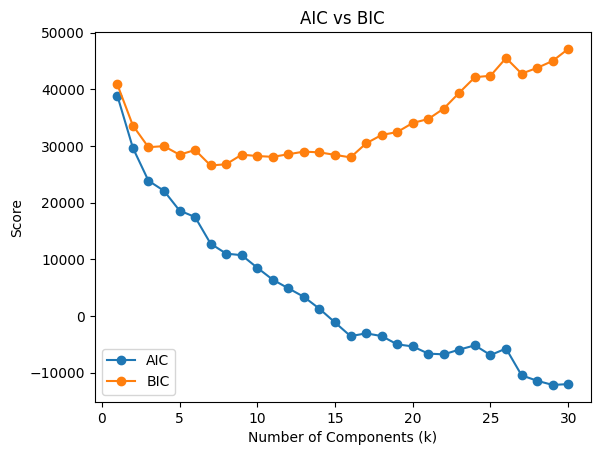

In [262]:
plt.plot(n_components_range, aic_scores, label='AIC', marker="o")
plt.plot(n_components_range, bic_scores, label='BIC',marker="o")
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.title("AIC vs BIC")
plt.legend()
plt.show()

- AIC: $2p - 2\log(L)$, where $p$, is the number of parameters and $L$ is the likelihood.
- BIC: $p\log(n) - 2\log(L)$, where $n$ is the number of samples.
- For both of them, lower is better. However, BIC penalizes complexity more as compared to AIC, so it tends to choose a smaller value of $k$.
- From the above graph, we see that the AIC values do not reach a minimum value, however the BIC value reaches a minimum at $k = 7$. Since BIC is more conservative than AIC, we will choose the optimum number of mixture components as $k = 7$.

In [255]:
n_comp = np.argmin(bic_scores)
print(f"The number of components chosen according to the BIC criteria is: {n_comp + 1}")

The number of components chosen according to the BIC criteria is: 7


Synthetic Data Generation

In [256]:
X_train_majority = X_train[Y_train == 0]
required_samples = len(X_train_majority) - len(X_train_minority)

In [257]:
gmm = GaussianMixture(n_components=n_comp, covariance_type='full', random_state=42, reg_covar=1e-6)
gmm.fit(X_train_minority)

X_sampled_minority, component_indices = gmm.sample(required_samples)

In [258]:
X_minority_balanced = np.vstack([X_train_minority,X_sampled_minority])
X_minority_balanced.shape

(227451, 30)

In [259]:
X_train_majority.shape

(227451, 30)

In [260]:
X_gmm = np.vstack([X_train_majority,X_minority_balanced])
Y_gmm_majority = np.zeros(len(X_train_majority))
Y_gmm_minority = np.ones(len(X_minority_balanced))
Y_gmm = np.concatenate([Y_gmm_majority,Y_gmm_minority])

In [261]:
Y_gmm

array([0., 0., 0., ..., 1., 1., 1.])

Rebalancing with CBU

- We reduce the majority class to 5 times the minority class.

In [228]:
print("Before:", Counter(Y_train))

undersampler = ClusterCentroids(sampling_strategy=0.2)
X_cbu, Y_cbu = undersampler.fit_resample(X_train, Y_train)

print("After:", Counter(Y_cbu))

Before: Counter({0: 227451, 1: 394})
After: Counter({0: 1970, 1: 394})


In [229]:
y_zero_cbu = len(Y_cbu) - np.sum(Y_cbu)
required_samples_2 = y_zero_cbu - np.sum(Y_cbu)

In [230]:
X_sampled_minority_2, component_indices = gmm.sample(required_samples_2)
X_sampled_minority_2.shape

(1576, 30)

In [231]:
X_cbu.shape

(2364, 30)

In [233]:
X_cbu_gmm = np.vstack([X_cbu,X_sampled_minority_2])
X_cbu_gmm.shape

(3940, 30)

In [234]:
Y_cbu_gmm = np.concatenate([Y_cbu,np.ones(required_samples_2)])

## Part C: Performance Evaluation and Conclusion

Model Training and Evaluation

GMM Sampled Model

In [235]:
model_gmm = LogisticRegression(max_iter=20000)
model_gmm.fit(X_gmm,Y_gmm)

LogisticRegression(max_iter=20000)

In [238]:
y_pred_gmm = model_gmm.predict(X_test)

In [239]:
print(classification_report(Y_test,y_pred_gmm,target_names=["non-fraud","fraud"],digits=4))

              precision    recall  f1-score   support

   non-fraud     0.9999    0.9837    0.9917     56864
       fraud     0.0893    0.9286    0.1629        98

    accuracy                         0.9836     56962
   macro avg     0.5446    0.9561    0.5773     56962
weighted avg     0.9983    0.9836    0.9903     56962



GMM - CBU Model

In [241]:
model_cbu_gmm = LogisticRegression(max_iter=20000)
model_cbu_gmm.fit(X_cbu_gmm,Y_cbu_gmm)

LogisticRegression(max_iter=20000)

In [242]:
y_pred_cbu_gmm = model_cbu_gmm.predict(X_test)

In [244]:
print(classification_report(Y_test,y_pred_cbu_gmm,target_names=["non-fraud","fraud"],digits=4))

              precision    recall  f1-score   support

   non-fraud     0.9999    0.9622    0.9807     56864
       fraud     0.0402    0.9184    0.0771        98

    accuracy                         0.9622     56962
   macro avg     0.5200    0.9403    0.5289     56962
weighted avg     0.9982    0.9622    0.9791     56962



Comparative Analysis

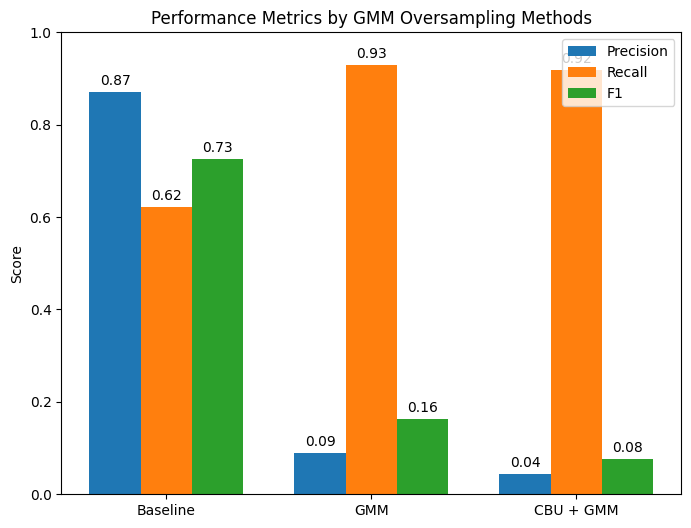

In [246]:
methods = ["Baseline","GMM","CBU + GMM"]
precision = [0.8714,0.0893,0.0437]
recall = [0.6224,0.9286,0.9184]
f1 = [0.7262,0.1629,0.0771]

x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width, precision, width, label="Precision")
bars2 = ax.bar(x, recall, width, label="Recall")
bars3 = ax.bar(x + width, f1, width, label="F1")

ax.set_ylabel("Score")
ax.set_title("Performance Metrics by GMM Oversampling Methods")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt="%.2f", padding=3)

plt.ylim(0, 1.0)
plt.show()

- We see that using a GMM sampling method for the minority class has improved the recall to 0.93, however, it has severely impacted the precision and f1-score. Likewise, the CBU + GMM method also suffers from the same issue. This could be due to the following reasons:
    1. The synthetic data points may lie in regions of overlap/regions where the majority class exists.
    2. The data distribution may be non-linear, due to which the classifier, which is linear is not able to identify a non-linear decision boundary.
    3. Undersampling from 284315 to 1970 is a huge jump, which can lead to significant information loss. Using GMM to then sample to the undersampled majority class will not have a beneficial impact.
    4. GMM is sensitive to outliers/data distribution. If the minority cluster contains noisy samples/is spread out, this will distort the Gaussian that has been fit to the cluster, leading to it generating noisy points.
- Since both the model's have better recall than the baseline, it implies that the models are no longer biased towards detecting the majority class. They are able to detect the majority class better, however, the low precision indicates that it misclassifies a bunch of non-fraud classes as fraud, which is impractical.

Final Recommendation

- Based on the results presented, the model that generalises the best on the dataset is the baseline model itself.
- However, the GMM method has the potential of outperforming the baseline model if the following changes are made:
    1. Identifying outliers in the minority and majority clusters and removing them before applying GMM. Additionally some form of regularisation can be applied to the GMM process as well to ensure that there is no overfitting.
    2. If the feature space is non-linear, projecting it to a higher dimensional space where it is linear would improve performance. This can be done using the kernel trick. Additional feature engineering could reveal correlations which can be exploited to improve separability.
    3. Instead of balancing the classes in a 1:1 ratio which would involve heavy oversampling/undersampling, we could instead oversample such that they are in a ratio such as 1:2/1:3. This can possibly allow the model to learn distinguishing features between both classes without loss of information/overfitting.
- If these methods are used, the GMM sampling method could prove to be more effective and efficient than the baseline.